In [1]:
import xarray as xr 
import glob
import os
import numpy as np

from tqdm.notebook import tqdm

In [2]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=8, memory_limit='4GiB')
client = Client(cluster)
client

/felles_gfi/felles_gfi_users/rogui7909/miniforge3/envs/robin/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41401 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:41401/status,
Dashboard: http://127.0.0.1:41401/status,Workers: 8
Total threads: 72,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41697,Workers: 8
Dashboard: http://127.0.0.1:41401/status,Total threads: 72
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:43138,Total threads: 9
Dashboard: http://127.0.0.1:42491/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:40081,


In [3]:
DATA_DIR = '/Data/gfi/users/rogui7909/data/FROGs/1DD_V1'
products = os.listdir(f'{DATA_DIR}')
products

['3B42_IR_v7.0',
 '3B42_MW_v7.0',
 '3B42RT_UNCAL_v7.0',
 '3B42RT_v7.0',
 '3B42_v7.0',
 'ARC2',
 'CFSR',
 'CHIRPS_v2.0',
 'CHIRP_V1',
 'CMORPH_v1.0_CRT',
 'CMORPH_v1.0_RAW',
 'COSCH',
 'CPC_v1.0',
 'ERA5',
 'ERAi',
 'GIRAFE',
 'GPCC_FDD_v1.0',
 'GPCC_FDD_v2018',
 'GPCC_FDD_v2020',
 'GPCC_FDD_v2022',
 'GPCC_FG_v1.0',
 'GPCP_CDR_v1.3_not_enforced',
 'GPCP_CDR_v1.3_yes_enforced',
 'GPCP_IP',
 'GPCP_V3.2',
 'GSMAP-gauges-NRT-v6.0',
 'GsMAP-gauges-NRT-v8',
 'GSMAP-gauges-RNLv6.0',
 'GSMAP-nogauges-NRT-v6.0',
 'GsMAP-nogauges-NRT-v8',
 'GSMAP-nogauges-RNLv6.0',
 'GSWP3',
 'HOAPSv4.0',
 'IMERG_V06_EU',
 'IMERG_V06_FC',
 'IMERG_V06_FU',
 'IMERG_V06_LU',
 'IMERG_V07B_FC',
 'IMERG_V07B_FU',
 'JRA-55',
 'MERRA1',
 'MERRA2',
 'MGP',
 'PERSIANN_CCS_CDR',
 'PERSIANN_v1_r1',
 'PrISM',
 'REGEN_ALL_V1-2019',
 'REGEN_LONG_V1-2019',
 'SM2RAIN-ASCAT',
 'SM2RAIN-ASCAT_v2-1-2n',
 'SM2RAIN-CCI',
 'TAMSAT_v2']

In [5]:
all_clim = []
fails = []
for product in tqdm(products):
    # ds_mask = xr.open_dataset('/Data/gfi/users/jodor4442/rainfall_regions/K39_ERA5land_lat_weighted_2d_direct.nc').rename(longitude='lon', latitude='lat')
    try:
        with xr.open_mfdataset(f"{DATA_DIR}/{product}/*", chunks = dict(lon=60, lat=60, time=365*5)).rain as ds:
            ds_europe = ds.sel(lon=slice(-12,40), lat=slice(30,90))
            ds_europe_clim = ds_europe.groupby(ds_europe.time.dt.season).mean().load()
            all_clim.append(ds_europe_clim.assign_coords(product=product))
    except:
        fails.append(product)
    
# ds_regrid = ds.rain.interp_like(ds_mask)
# weights = xr.ones_like(ds_mask.tp)*np.cos(np.deg2rad(ds_mask.tp.lat))
# rain_TP = ((weights*ds_regrid).groupby(ds_mask.tp).sum(keep_attrs=True)/((weights).groupby(ds_mask.tp).sum(keep_attrs=True)))
# rain_TP.attrs['units'] = 'mm/day'
# rain_TP.attrs['long_name'] = 'Cumulative daily precipitation'
# rain_TP = rain_TP.rename('rain')
# rain_TP.rename(tp='mask_id')#.to_netcdf('/Data/gfi/users/rogui7909/data/FROGs/ERA5_daily_rainfall_TP.nc')


  0%|          | 0/52 [00:00<?, ?it/s]

/tmp/ipykernel_121706/4121033701.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 60. This could degrade performance. Instead, consider rechunking after loading.
  with xr.open_mfdataset(f"{DATA_DIR}/{product}/*", chunks = dict(lon=60, lat=60, time=365*5)).rain as ds:
/tmp/ipykernel_121706/4121033701.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 60. This could degrade performance. Instead, consider rechunking after loading.
  with xr.open_mfdataset(f"{DATA_DIR}/{product}/*", chunks = dict(lon=60, lat=60, time=365*5)).rain as ds:
/tmp/ipykernel_121706/4121033701.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 60. This could degrade performance. Instead, consider rechunking after loading.
  with xr.open_mfdataset(f"{DATA_DIR}/{product}/*", chunks = dict(lon=60, lat=60, time=365*5)).rain as ds:
/tmp/ipykernel_1217

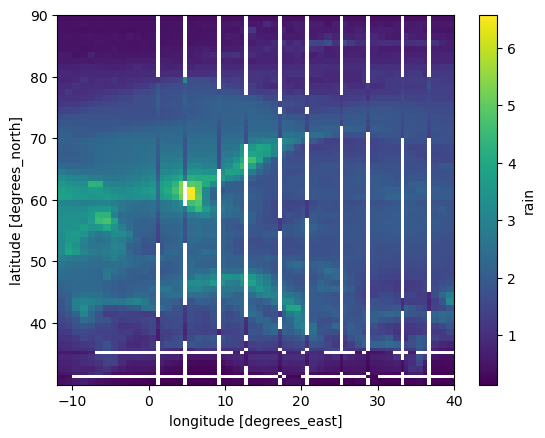

In [11]:
xr.concat(all_clim, dim='product').mean('season').mean('product').plot()

In [31]:
ds_europe.time.dt.season

<xarray.DataArray 'season' (time: 14245)> Size: 171kB
array(['DJF', 'DJF', 'DJF', ..., 'DJF', 'DJF', 'DJF'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 114kB 1982-01-01T12:00:00 ... 2020-12-31T1...
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

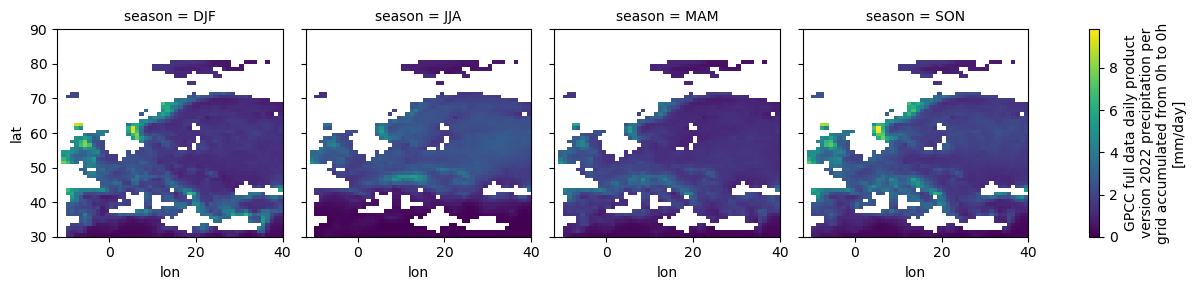

In [ ]:
.plot(col='season')

NameError: name 'ds_TP' is not defined

In [ ]:
ds_mask = xr.open_dataset('/Data/gfi/users/jodor4442/rainfall_regions/K39_ERA5land_lat_weighted_2d_direct.nc').rename(longitude='lon', latitude='lat')
all_rain = []
products_chosen = [ 'JRA-55','ERAi','ERA5','MERRA2','CFSR','REGEN_ALL_V1-2019','REGEN_ALL_V1-2019','MERRA1','GPCC_FDD_v2022']
for product in tqdm(products_chosen):
    try:
        ds = xr.open_mfdataset(f"{DATA_DIR}/{product}/*",chunks=dict(lon=30,lat=30, time=365*12))
        ds_regrid = ds.rain.interp_like(ds_mask)
        weights = xr.ones_like(ds_mask.tp)*np.cos(np.deg2rad(ds_mask.tp.lat))
        rain_TP = ((weights*ds_regrid).groupby(ds_mask.tp).sum()/((weights).groupby(ds_mask.tp).sum())).load()
        all_rain.append(rain_TP.assign_coords(product=product))
    except Exception as e:
        print(product)
        print(e)
ds_TP = xr.concat(all_rain, dim='product').rename(tp='mask_id')

  0%|          | 0/9 [00:00<?, ?it/s]

/tmp/ipykernel_274493/1998586663.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 30. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(f"{DATA_DIR}/{product}/*",chunks=dict(lon=30,lat=30, time=365*12))
/tmp/ipykernel_274493/1998586663.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 30. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(f"{DATA_DIR}/{product}/*",chunks=dict(lon=30,lat=30, time=365*12))
/tmp/ipykernel_274493/1998586663.py:6: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 30. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(f"{DATA_DIR}/{product}/*",chunks=dict(lon=30,lat=30, time=365*12))
/tmp/ipykernel_274493/1998586663.py:6: UserWarning: The specifie

: 

In [5]:
ds_TP.to_netcdf('/Data/gfi/users/rogui7909/data/FROGs/daily_rainfall_on_mask_TP.nc')

: 

: 

In [ ]:

# ds_mask_interp = ds_mask.interp(lon=ds_rain.lon, lat=ds_rain.lat, method='nearest')
# mask = ds_mask_interp.where(ds_mask_interp==14, drop=True).tp


In [22]:
ds_regrid = ds.rain.interp_like(ds_mask)

In [ ]:
weights = xr.ones_like(ds_mask.tp)*np.cos(np.deg2rad(ds_mask.tp.lat))
rain_TP = ((weights*ds_regrid).groupby(ds_mask.tp).sum()/((weights).groupby(ds_mask.tp).sum())).load()



<Axes: ylabel='tp'>

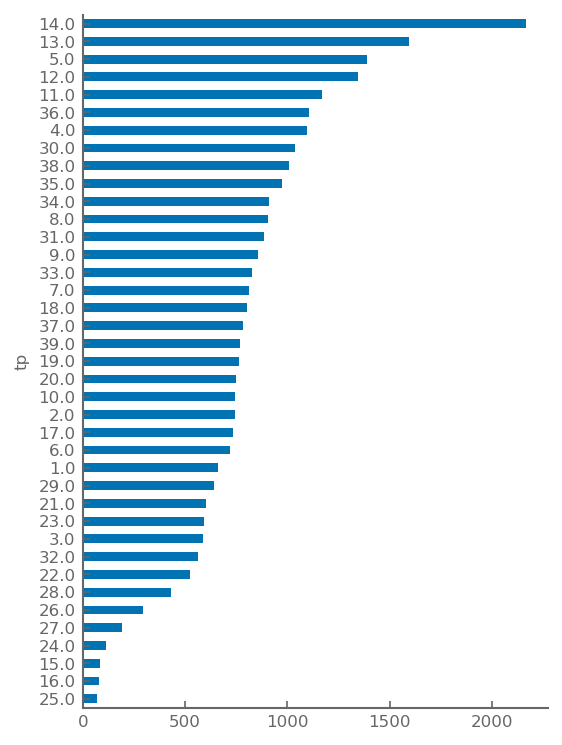

In [ ]:
import matplotlib.pyplot as plt 

plt.style.use('robin')

fig, axs = plt.subplots(figsize=(4,6))
rain_TP.resample(time='YS').sum().mean('time').to_series().sort_values().plot.barh()
